<a href="https://colab.research.google.com/github/Jaydenzk/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [47]:
import math

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean_sales = sum(sales)/len(sales)
print("mean", mean_sales)


variance_sales = sum((i - mean_sales)**2 for i in sales) / len(sales)
print("variance", variance_sales)


standard_dev_sales = math.sqrt(variance_sales)
print("standard deviation", standard_dev_sales)

mean 3052.714285714286
variance 183761.06122448976
standard deviation 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [8]:
import numpy as np

customers = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, customers, ddof=0)[0][1]

print("covariance", covariance)

covariance 6518.020408163265


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [9]:
standard_dev_customers = np.std(customers)
print("standard dev", standard_dev_customers)

corr_coefficient = covariance / (standard_dev_sales * standard_dev_customers)
print("correlation coefficient", corr_coefficient)

print("correlation coefficient using numpy", np.corrcoef(sales, customers)[0,1])

standard dev 15.792015549069118
correlation coefficient 0.9628339778148909
correlation coefficient using numpy 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [10]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [11]:
df = df.select_dtypes(include=['number']).copy()
df.drop(['Unnamed: 0', 'body'], inplace=True, axis=1)
df.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [12]:
df.isnull().sum()

pclass              1
survived            1
age                 0
sibsp               1
parch               1
fare                2
has_cabin_number    0
dtype: int64

In [13]:
df.fillna(method='ffill', inplace=True)
df.isna().sum()

pclass              0
survived            0
age                 0
sibsp               0
parch               0
fare                0
has_cabin_number    0
dtype: int64

In [14]:
df.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [15]:
df.has_cabin_number.value_counts()

0    1015
1     295
Name: has_cabin_number, dtype: int64

In [16]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.701812,-0.127357,-3.951584,0.052781,0.013070,-24.218042,-0.249923
survived,-0.127357,0.236181,-0.314103,-0.013932,0.034861,6.151406,0.061424
age,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.651280,1.463138
sibsp,0.052781,-0.013932,-2.557851,1.084413,0.336722,8.647858,-0.003858
parch,0.013070,0.034861,-1.458263,0.336722,0.748735,9.927754,0.013372
fare,-24.218042,6.151406,113.651280,8.647858,9.927754,2675.845648,10.968906
has_cabin_number,-0.249923,0.061424,1.463138,-0.003858,0.013372,10.968906,0.174613


In [17]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312816,-0.366271,0.060502,0.018030,-0.558853,-0.713932
survived,-0.312816,1.000000,-0.050187,-0.027529,0.082901,0.244693,0.302469
age,-0.366271,-0.050187,1.000000,-0.190730,-0.130862,0.170603,0.271887
sibsp,0.060502,-0.027529,-0.190730,1.000000,0.373689,0.160539,-0.008865
parch,0.018030,0.082901,-0.130862,0.373689,1.000000,0.221797,0.036982
fare,-0.558853,0.244693,0.170603,0.160539,0.221797,1.000000,0.507451
has_cabin_number,-0.713932,0.302469,0.271887,-0.008865,0.036982,0.507451,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

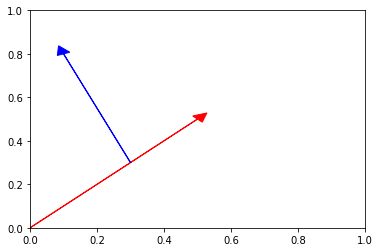

In [22]:
import matplotlib.pyplot as plt

plt.arrow(0,0,.5,.5, head_width= 0.04, head_length = 0.04, color= 'r')
plt.arrow(.3,.3,-.2,.5,head_width= 0.04, head_length = 0.04, color= 'b');

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [23]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

dot = np.dot(a, b)
print("dot", dot)

dot -40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [27]:
c = [2, -15, 6, 20]

print("norm of c^2: ", np.linalg.norm(c)**2)
print("c*c: ", np.dot(c, c))
print("c^Tc: ", (np.dot(np.array(c).T, c)))

norm of c^2:  665.0
c*c:  665
c^Tc:  665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix}1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0\\1 \end{bmatrix} = 7\hat{i} + 
12\hat{j}
\qquad
\end{align}


\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1\\0\\0 \end{bmatrix} + 3\begin{bmatrix} 0\\1\\0 \end{bmatrix}
+(-8)\begin{bmatrix} 0\\0\\1 \end{bmatrix} = 2\hat{i} + 11\hat{j}  + (-8)\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [30]:
f = [4, 12, 11, 9, 2]

f = np.array(f)
f_unit = f / (np.linalg.norm(f))
print("f_unit vector: ", f_unit)

f_unit vector:  [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

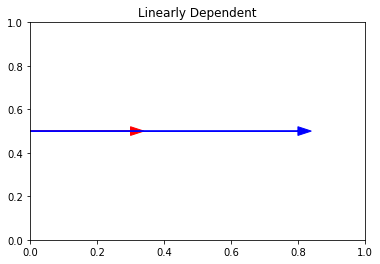

In [33]:
plt.arrow(0,0.5,.3,0, head_width= .04, head_length =.04, color= 'r')
plt.arrow(0,0.5,.8,0, head_width= .04, head_length =.04, color= 'b')
plt.title("Linearly Dependent");

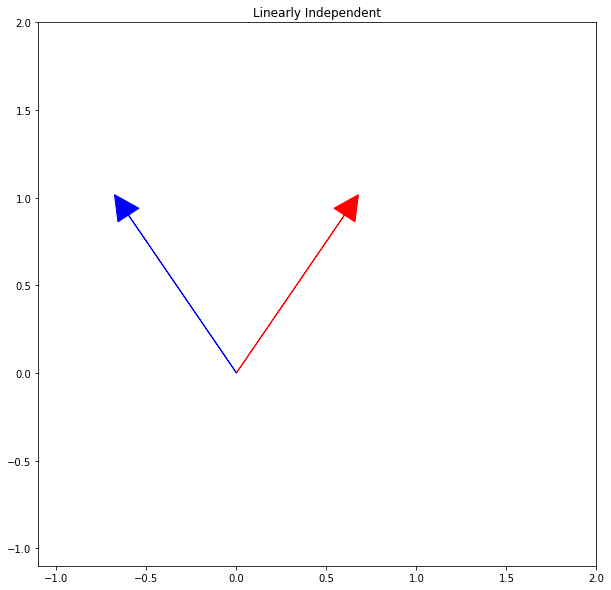

In [36]:
fig = plt.figure(figsize = (10,10))
plt.xlim(-1.1,2)          
plt.ylim(-1.1,2)

plt.arrow(0,0,.6,.9, head_width = .14 , head_length = .14, color = 'r')
plt.arrow(0,0,-.6,.9, head_width= .14 , head_length = .14, color = 'b')
plt.title('Linearly Independent');

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

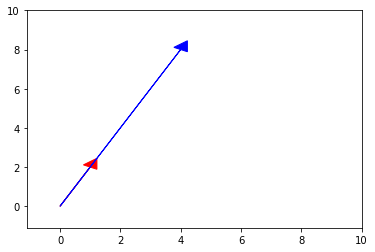

In [39]:
plt.xlim(-1.1,10)          
plt.ylim(-1.1,10)
plt. arrow(0,0,1,2, head_width = .5, head_length = .5, color= 'r')
plt. arrow(0,0,4,8, head_width = .5, head_length = .5, color= 'b');

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [46]:
v_l = np.array([1, 2, 3])
v_m = np.array([-1, 0, 7])
v_n = np.array([4, 8, 2])


v_l.dot(v_l), v_m.dot(v_m), v_n.dot(v_n)

(14, 50, 84)

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



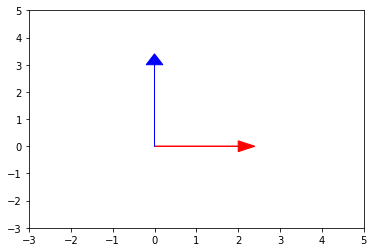

In [51]:
plt.ylim(-3,5)
plt.xlim(-3,5)
plt. arrow(0,0,2,0, head_width = 0.4, head_length = 0.4 , color = 'r')
plt.arrow(0,0,0,3, head_width = 0.4, head_length = 0.4 , color = 'b');

## 6.2 What does it mean to form a basis?

two or more vectors are linarly independent and combinations span the space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [52]:
P = np.matrix(
    [[ 1, 2, 3], 
     [-1, 0, 7], 
     [ 4, 8, 2]]
)

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It indicates the dimension of the space span by the vectors

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [55]:
v = np.array([1,3])
w = np.array([-1,2])
projLW = np.dot(w,v)*v / np.dot(v,v)
print(projLW)

[0.5 1.5]


In [56]:
w_minus_proj = w - projLW
print(w_minus_proj)

[-1.5  0.5]


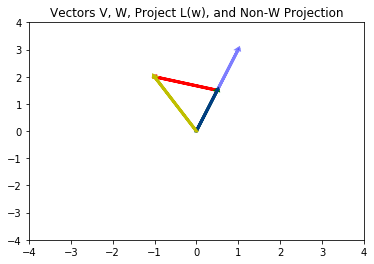

In [63]:
plt.xlim(-4,4)          
plt.ylim(-4,4)

v = np.array([1,3])
w = np.array([-1,2])

plt.arrow(projLW[0], projLW[1], w_minus_proj[0], w_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='r')
plt.arrow(0, 0, projLW[0], projLW[1], linewidth=3, head_width=.05, head_length=0.05, color ='g')
plt.arrow(0, 0, v_v[0], v_v[1], linewidth=3, head_width=.05, head_length=0.05, alpha=.5, color ='b')
plt.arrow(0, 0, v_w[0], v_w[1], linewidth=3, head_width=.05, head_length=0.05, color ='y')

plt.title("Vectors V, W, Project L(w), and Non-W Projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

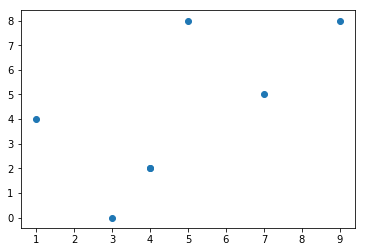

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()